# Midterm project submission
Due April 4th (Sunday) 23:59pm.

You should address all the questions relevant to your project.
You will not be graded based on the values of the model performance, but on whether or not you have applied the right methodology: formulated the business model, translated it into a right machine learning approach, analyzed your data, prepared it for modelling, applied at least one machine learning approach, used cross validation for model tuning, evaluated your model using the relevant metrics.

If you have tried different approaches, please include them all, and not just the best one.
If doing some feature engineering or feature selection has improved your model, also please include all of the steps, not just the most sucessfull ones.

Here, fill out the student IDs:

#### Manuel Peixoto 43979 
#### Gabriel Guérin 44169 
#### Sepehr Zarrabi 46321
#### Benjamin C. Herbert 45775

## What business problem are you solving?
Please state clearly what business problem are you solving (one sentence). You may add a few sentences to explain why is this a relevant problem.


##### We are trying to understand which credit card transactions are fraudulent. $24.26 Billion was lost in 2018 due to payment card fraud worldwide. Financial institutions are usually left out of the conversation, but they are the main victims behind the scenes. The same year, 10\% of data breaches involved financial companies including banks and credit unions. With such a huge number, fraudsters are continually finding new ways to commit their illegal activities. It has become essential for financial institutions and businesses to develop advanced fraud detection techniques to counter the threat of fraudulent credit card transactions and identity theft and keep losses to a minimum. This is where our project comes into play.

## What is the machine learning problem that you are solving?
Is it a classification problem or a regression problem? 
Is the goal to build a model that generates a ranked list, or is it to detect anomalies as new data come in? 
Are you doing clustering to find hidden patterns?
If applicable, what is your target?

##### So I would say wehave a classifivcation problem, where we need to classify transactions as fraudulent or not fraudulent. The model should be able to detect anomalies, I would suggest the implementation of density based clustering.


## Data exploration and preparation 

- How many data instances do you have?
- Do you have duplicates?
- How many features? What type are they?
- If they are categorical, what categories they have, what is their frequency?
- If they are numerical, what is their distribution?
- What is the distribution of the target variable?
- If you have a target, you can also check the relationship between the target and the variables.
- Do you have missing data? If yes, how are you going to handle it?
- Can you use the features in their original form, or do you need to alter them in some way?

If you have a lot of features, for midterm submission, you can choose to use only a subset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


from matplotlib import pyplot as plt
%matplotlib inline

import tubesml as tml
import warnings
from sklearn.preprocessing import StandardScaler


import imblearn
from sklearn.model_selection import RandomizedSearchCV 

import time

In [3]:
data = pd.read_csv("fraud.csv")
data.head()# 30 numerical and continuous features , 1 which is the target is numerical but discrete (binary)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,85380.0,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,...,0.332076,1.124621,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,72.64,0
1,116137.0,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,...,-0.329597,-0.310603,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,35.29,0
2,81976.0,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,...,-0.258700,-0.638700,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,0.99,0
3,106007.0,-0.830622,1.222904,1.859594,-0.318554,0.272904,0.080357,0.385614,-0.167806,1.502836,...,-0.242243,-0.528849,-0.360037,-0.740677,0.367026,-0.700618,-0.323105,0.064605,2.12,0
4,141650.0,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,...,0.392735,1.461507,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,1.00,0


In [4]:
data.describe() # 100k instances for all features 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,94687.067280,-0.022629,0.010256,-0.020837,0.006603,-0.004965,-0.006852,-0.018368,0.003419,-0.012216,...,0.003175,0.000419,-0.002650,-0.000388,-0.002131,-0.001867,0.000203,0.000788,88.668824,0.00492
std,47500.088153,2.003614,1.694185,1.610477,1.445404,1.412881,1.334214,1.317687,1.236340,1.113818,...,0.754074,0.728605,0.639199,0.605154,0.525830,0.481124,0.408238,0.322333,258.196817,0.06997
min,0.000000,-41.928738,-60.464618,-32.965346,-5.600607,-40.427726,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-9.845808,-8.656570,0.000000,0.00000
25%,54085.000000,-0.926617,-0.597354,-0.900993,-0.856263,-0.691119,-0.770176,-0.557718,-0.208494,-0.654482,...,-0.228588,-0.543103,-0.163279,-0.353671,-0.319392,-0.327571,-0.071019,-0.053248,5.430000,0.00000
50%,84709.500000,-0.001764,0.073709,0.177200,-0.025905,-0.050189,-0.276844,0.040558,0.025242,-0.059102,...,-0.029977,0.005641,-0.011391,0.040204,0.015178,-0.052921,0.001915,0.011348,21.800000,0.00000
75%,139075.250000,1.311258,0.814430,1.030190,0.746933,0.613147,0.393177,0.571868,0.331814,0.592496,...,0.187140,0.527816,0.147257,0.437819,0.350376,0.239690,0.091819,0.079501,76.000000,0.00000
max,172787.000000,2.451888,22.057729,4.187811,16.875344,34.099309,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985,22.528412,4.022866,7.519589,3.220178,12.152401,22.620072,18910.000000,1.00000


In [5]:
data.isnull().sum() # no missing data, awsome

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.shape

(100000, 31)

### Distribution of the target variable

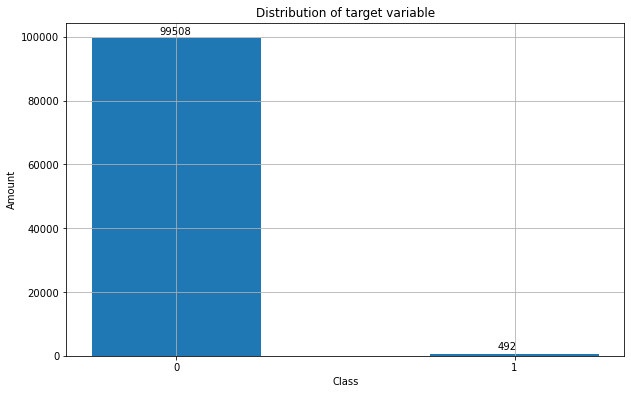

In [7]:
series = data['Class'].value_counts()
plt.rcParams["figure.figsize"] = (10,6.13)
plt.bar(series.index.values, series.values, width = 0.5)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Distribution of target variable")
for i in range(0,2):
    plt.text(series.index.values[i]-0.05, series.values[i]+1400,series.values[i])

plt.grid()
plt.xticks(series.index.values)
plt.show();

 We have highly unbalanced data with a lot of non fraudulent and very few fraudulent

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


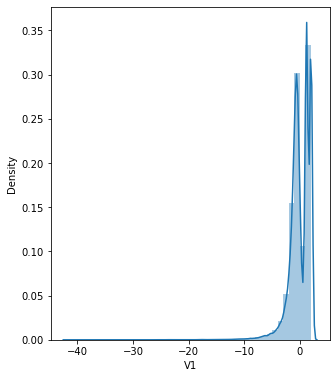

In [27]:
# Distribution of the variable V1
sns.distplot(data.V1,bins=np.arange(-12,3));# all the feautures that start with a V  appear to have similar distributions# however the feature amount and time have a very different distribution

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='Time', ylabel='Density'>

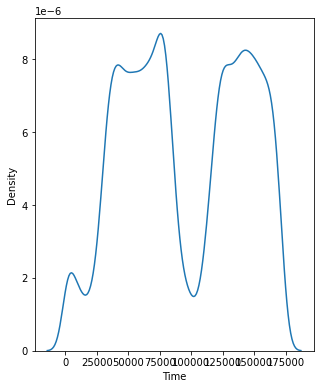

In [28]:
# Distribution of the variable Time
sns.distplot(data.Time,bins=np.arange(500000,600000)) # this takes around 6 min
# It suggests maybe there are times of the day where fraud is more commun

In a next step we're introducing a variable for day, hour, minute and second, while we're measuring the time delta with from the start of the observation. Even though this step already fits into the area of feature engineering, we take this step in advance in order to take the generated data into account in our initial data exploration.  


In [29]:
time = data['Time']

In [30]:
time = pd.Series(time).array
print(type(time))
print(time)

<class 'pandas.core.arrays.numpy_.PandasArray'>
<PandasArray>
[ 85380.0, 116137.0,  81976.0, 106007.0, 141650.0, 140296.0, 127984.0,
  38225.0,  45410.0, 153576.0,
 ...
 165981.0, 166028.0, 166831.0, 166883.0, 167338.0, 169142.0, 169347.0,
 169351.0, 169966.0, 170348.0]
Length: 100000, dtype: float64


We're gonna have to do it manually as timedelta is hard to split into columns.
Further we know the time we have is in seconds and is split between 2 different days

In [31]:
day = []
hourl = []
minutel = []
secondl = []
for date in time:
    hour = 0
    second = 0
    minute = 0
    if date >= 86400:
        day.append(1)
        hour = ((date - 86400)/3600)
        minute = (((hour%1)*60) )
        second = (((minute%1)*60) )
        hour = round(hour - hour%1) # we need to sibtract the decimal part so we don't get a time like 24:30
        minute = round(minute - minute%1)
        second = round(second - second%1)
        hourl.append(hour)
        minutel.append(minute)
        secondl.append(second)
        
    else :
        day.append(0)
        hour = ((date )/3600)
        minute = (((hour%1)*60) )
        second = (((minute%1)*60) )
        hour = round(hour - hour%1)
        minute = round(minute - minute%1)
        second = round(second - second%1)
        hourl.append(hour)
        minutel.append(minute)
        secondl.append(second)

In [32]:
print(secondl[:5])
print(hourl[:5])
print(minutel[:5])

[59, 37, 15, 46, 49]
[23, 8, 22, 5, 15]
[42, 15, 46, 26, 20]


In [33]:
print(len(hourl))

100000


We will not add the variables minute and second because intuitively we don't believe they would matter as much as the hour at which frauds occour. The day could also be important because they could be 2 different types of day, i.e work day, weekend, holiday, etc

In [34]:
data['day'] = day
data['hour'] = hourl
#data['minute'] = minutel
#data['second'] = secondl

In [35]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,day,hour
0,85380.0,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,...,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,72.64,0,0,23
1,116137.0,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,...,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,35.29,0,1,8
2,81976.0,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,...,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,0.99,0,0,22
3,106007.0,-0.830622,1.222904,1.859594,-0.318554,0.272904,0.080357,0.385614,-0.167806,1.502836,...,-0.360037,-0.740677,0.367026,-0.700618,-0.323105,0.064605,2.12,0,1,5
4,141650.0,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,...,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,1.00,0,1,15


In [36]:
print(data.shape)
data.describe()

(100000, 33)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,day,hour
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,94687.067280,-0.022629,0.010256,-0.020837,0.006603,-0.004965,-0.006852,-0.018368,0.003419,-0.012216,...,-0.002650,-0.000388,-0.002131,-0.001867,0.000203,0.000788,88.668824,0.00492,0.491830,14.007230
std,47500.088153,2.003614,1.694185,1.610477,1.445404,1.412881,1.334214,1.317687,1.236340,1.113818,...,0.639199,0.605154,0.525830,0.481124,0.408238,0.322333,258.196817,0.06997,0.499936,5.859471
min,0.000000,-41.928738,-60.464618,-32.965346,-5.600607,-40.427726,-23.496714,-43.557242,-41.044261,-13.434066,...,-44.807735,-2.836627,-10.295397,-2.604551,-9.845808,-8.656570,0.000000,0.00000,0.000000,0.000000
25%,54085.000000,-0.926617,-0.597354,-0.900993,-0.856263,-0.691119,-0.770176,-0.557718,-0.208494,-0.654482,...,-0.163279,-0.353671,-0.319392,-0.327571,-0.071019,-0.053248,5.430000,0.00000,0.000000,10.000000
50%,84709.500000,-0.001764,0.073709,0.177200,-0.025905,-0.050189,-0.276844,0.040558,0.025242,-0.059102,...,-0.011391,0.040204,0.015178,-0.052921,0.001915,0.011348,21.800000,0.00000,0.000000,14.000000
75%,139075.250000,1.311258,0.814430,1.030190,0.746933,0.613147,0.393177,0.571868,0.331814,0.592496,...,0.147257,0.437819,0.350376,0.239690,0.091819,0.079501,76.000000,0.00000,1.000000,19.000000
max,172787.000000,2.451888,22.057729,4.187811,16.875344,34.099309,23.917837,44.054461,20.007208,10.392889,...,22.528412,4.022866,7.519589,3.220178,12.152401,22.620072,18910.000000,1.00000,1.000000,23.000000


After including the time variables our data consists of 34 variables and 100,000 observation  

In [37]:
fraud = data.loc[data.Class == 1]
# select the subset of columns
df_count_hour = fraud[['hour', 'Class']].groupby(["hour", "Class"]).size().reset_index(name='counts')
df_count_hour.set_index("hour",inplace=True)
df_count_hour = df_count_hour.pivot(columns="Class", values="counts")
print(fraud.shape)

(492, 33)


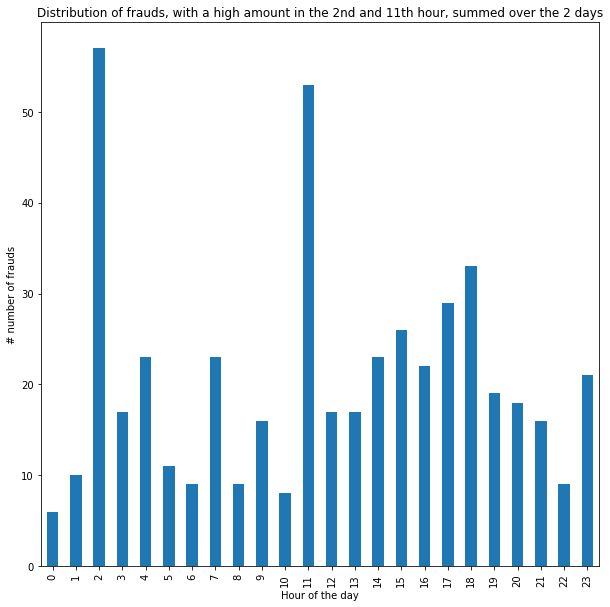

In [38]:
df_count_hour.plot( kind="bar",stacked=True, figsize=(10,10), legend = False)
plt.ylabel("# number of frauds");
plt.xlabel("Hour of the day")
plt.title("Distribution of frauds, with a high amount in the 2nd and 11th hour, summed over the 2 days");

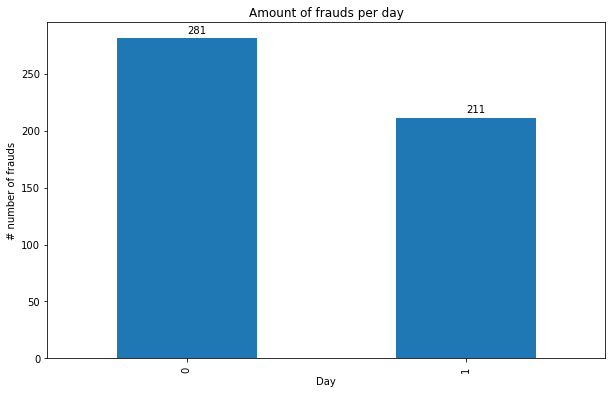

In [39]:
df_count = fraud[['day', 'Class']].groupby(["day", "Class"]).size().reset_index(name='counts')
df_count.set_index("day",inplace=True)
df_count = df_count.pivot(columns="Class", values="counts")

df_count.plot( kind="bar",stacked=True, figsize=(10,10*0.618), legend = False)
for i in range(0,2):
    plt.text(df_count[1].index.values[i],df_count[1].values[i]+5, df_count[1].values[i] )
    
plt.ylabel("# number of frauds");
plt.xlabel("Day");
plt.title("Amount of frauds per day");

#### So the variable hour can be quite important, we know that at 2 am and 11 am there is a lot of fraud for example. And it would appear that there were more fraudulent transactions in the first day.

In [40]:
print(data.shape)

(100000, 33)


In [41]:
#If you have a target, you can also check the relationship between the target and the variables.
#not sure how to adress this part: maybe a contingency table
pd.crosstab(data.Amount, data.Class)
# We seem to have fraud with no amount of money transfered, that's strange....

Class,0,1
Amount,,
0.00,652,27
0.01,251,5
0.02,31,0
0.04,2,0
0.05,19,0
...,...,...
10199.44,1,0
11789.84,1,0
11898.09,1,0


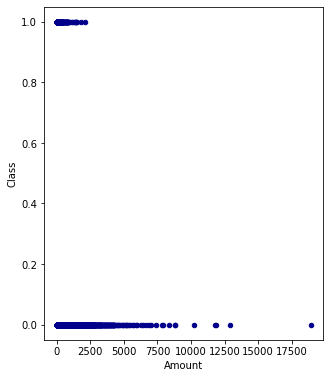

In [42]:
#or a plot
ax1 = data.plot.scatter(x='Amount',
                      y='Class',
                      c='DarkBlue') # fraud appears to be concentrated in lower Amounts

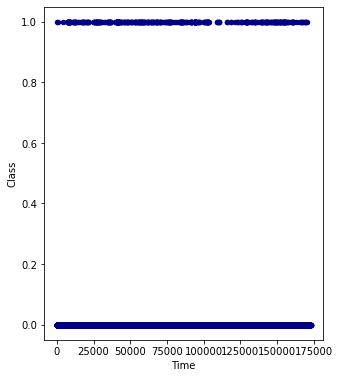

In [43]:
ax2 = data.plot.scatter(x='Time',
                      y='Class',
                      c='DarkBlue') # but it is also uniform acorss time

Let's take a look at the relationship between variables.
This is important, because variables Highly correlated (negativ or positiv) with Class could be informative in detecting Fraud

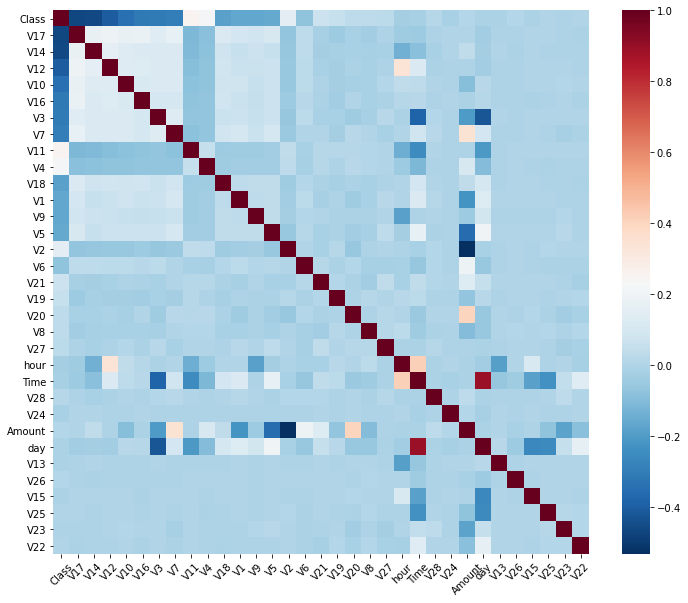

In [44]:
high_corr = tml.plot_correlations(data, target='Class', limit=33)

In [45]:
print(data.shape)
duplicateRowsDF = data[data.duplicated()]

(100000, 33)


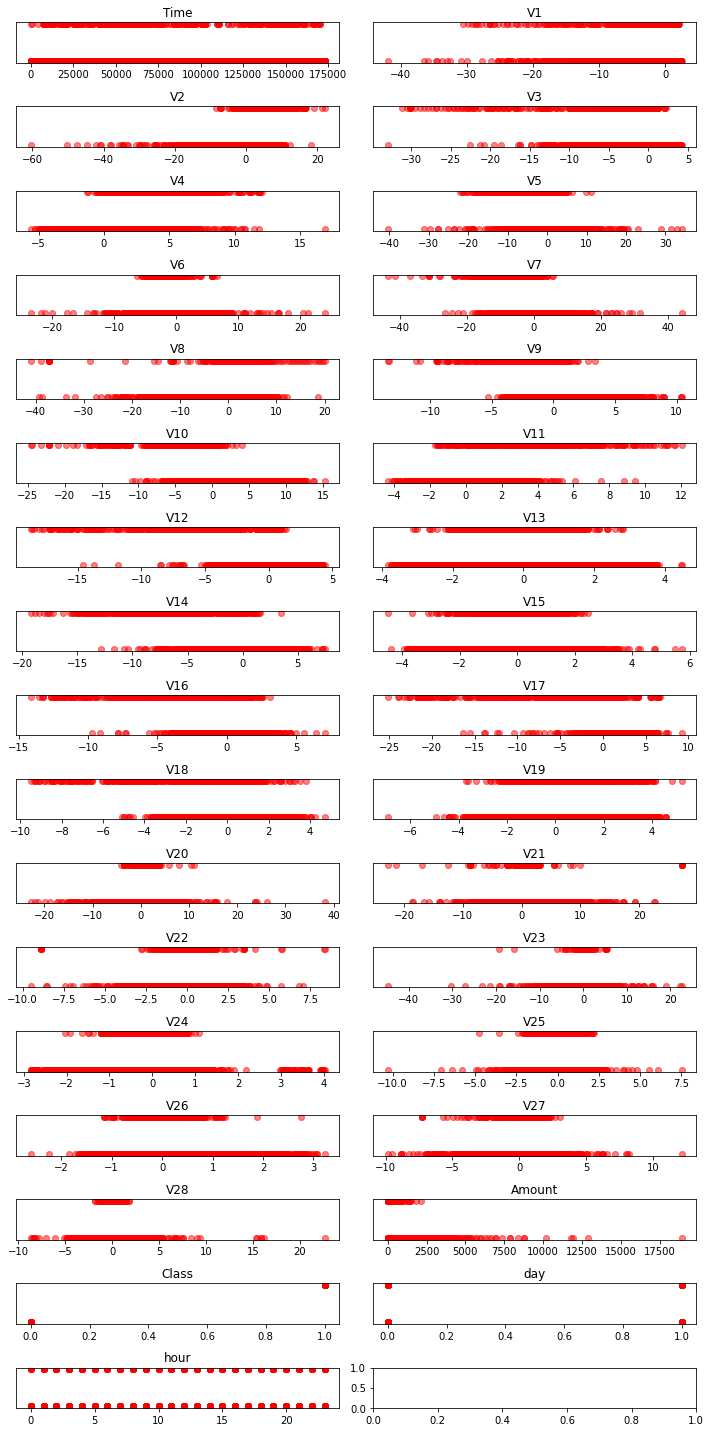

In [46]:
# This is more informative, we have the class distribution per variable
columns = list(data.columns) 

fig, axes = plt.subplots(17, 2, figsize=(10, 20))
# ravel() function is used to create a contiguous flattened array.
ax = axes.ravel()

# plot for each of the 30 features
for i in range(33):
 
    ax[i].scatter(data.iloc[:, i],data.Class, color='red', alpha=.5)
    ax[i].set_title(columns[i])
    ax[i].set_yticks(())

fig.tight_layout() # this gives us a better view of what the good variables would be
# For example Time does not appear to be a very good variable, but v2 or v8 may be a bit better 


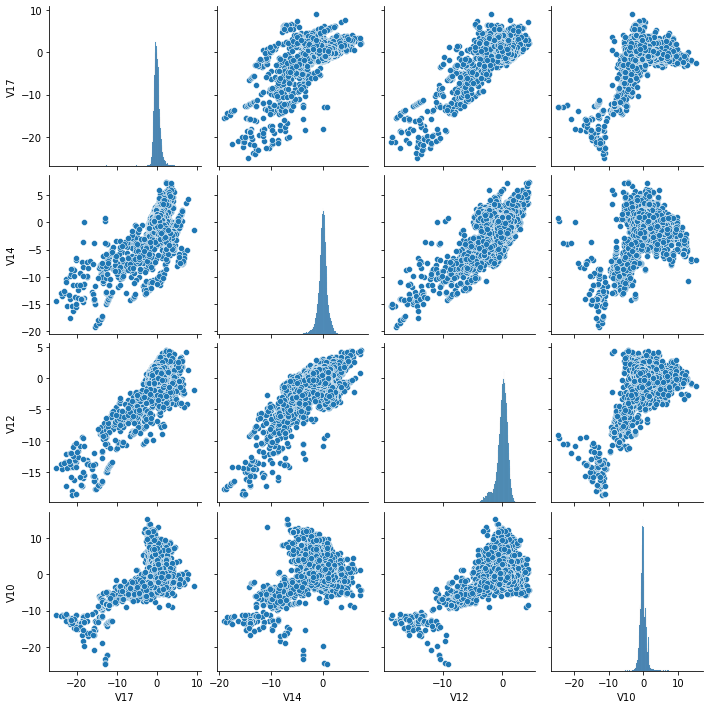

In [47]:
cols=['V17','V14','V12','V10']
sns.pairplot(data[cols]);
# Some of what we suspect are the most discriminatory variables seem to be correlated between themselves to

In [48]:
print(data.shape)

(100000, 33)


### Duplicate analysis

In [49]:
duplicateRowsDF = data[data.duplicated()]
#print(duplicateRowsDF) # we have 193 duplicate rows, should we delete them ?
print(duplicateRowsDF['Class'].value_counts()) # No we should not, has the best fraud transactions are copicats of 
#real transactions

duplicate_rows_index = data.index[data.duplicated() == True].tolist()

0    174
1     19
Name: Class, dtype: int64


# So what insights can we extract from this EDA?

First- We understand that we do have a very imbalanced dataset, so a data balancing method will probably come in usefull. 

Second- We may also try to work with the unbalanced data and use methods apropiate for this sort of data, like dbscan or OPTICS


# Baseline model 
#### Before we continuing with any further varibale selection or modeling advanced models we're gonna build our simple basline model 
#### As a baseline model we use a simple decision tree with randomized search cross validation

We gonna split our dataset into training and test. In a second step we divide the training dataset into train and validation set to use for cross validation. The test set is only used in the very end to avoid using it for the model selection. The decision tree is fitted with all variables. 

In [50]:
X_train, X_test, y_train, y_test = train_test_split( data, data.Class, random_state=0)
del X_train['Class']
del X_test['Class']
X_train_val, X_val, y_train_val, y_val = train_test_split( X_train, y_train, random_state=0)
print(data.shape, "Shape of the whole dataset") 
print(X_train.shape, X_test.shape,"Shape of the train and test set")
print(X_train_val.shape, X_val.shape, "Shape of the train and validation set after second split")

(100000, 33) Shape of the whole dataset
(75000, 32) (25000, 32) Shape of the train and test set
(56250, 32) (18750, 32) Shape of the train and validation set after second split


In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_roc_curve

In [52]:
# Setup the parameters and distributions to sample from: param_dist
distributions = {"max_depth": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
random_search = RandomizedSearchCV(tree, distributions, n_iter=20,random_state=1,cv=10, scoring='f1')

# Fit it to the data,  only unsing the training set
random_search.fit(X_train_val,y_train_val)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8}
Best score is 0.8506921871232216


In [89]:
y_pred_base=random_search.best_estimator_.predict(X_val)
print(classification_report(y_val, y_pred_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18648
           1       0.86      0.84      0.85       102

    accuracy                           1.00     18750
   macro avg       0.93      0.92      0.93     18750
weighted avg       1.00      1.00      1.00     18750



In [90]:
specificity = confusion_matrix(y_val, y_pred_base)[1][1]/(confusion_matrix(y_val, y_pred_base)[1][1]+confusion_matrix(y_val, y_pred_base)[1][0])
recall = confusion_matrix(y_val, y_pred_base)[0][0]/(confusion_matrix(y_val, y_pred_base)[0][0]+confusion_matrix(y_val, y_pred_base)[0][1])
precision =  confusion_matrix(y_val, y_pred_base)[0][0]/(confusion_matrix(y_val, y_pred_base)[0][0]+confusion_matrix(y_val, y_pred_base)[1][0])
f1_score = 2*recall*precision/(recall+precision)
    
print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_base))
print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)
    

The confusion matrix is: 
 [[18634    14]
 [   16    86]]
The f1 score is:  0.9991956673280069    and the specificity is :  0.8431372549019608


With the base line model established we now continuing to improve our model

In this Business context we intend to find as much frauds as possible, so we want to minimize our 
false positive rate (frauds not detected) and maximize ou true negative rate (frauds detected).
For this Specificity is the best metric as it is Spec = TN/(TN+FP), so a specificity of 1
would mean we detected every fraudulent transaction!
However, we could get a perfect specificity by saying that all transactions are fraudulent, so for that we need a balance of a good f1 score and specificity, it's a trade-off.

## Feature engineering
Creating good features is probably the most important step in the machine learning process. 
This might involve doing:
- transformations
- aggregating over data points or over time and space, or finding differences (for example: differences between two monthly bills, time difference between two contacts with the client) 
- creating dummy (binary) variables
- discretization. 

Business insight is very relevant in this process.

For projects where some features are anonymized, not a lot can be done here, except preparing the format of the variables to be suitable for the selected model.


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_val)
X_train_scaled = scaler.transform(X_train_val)
X_val_scaled = scaler.transform(X_val)

print(X_train.shape, X_test.shape, data.shape)

(75000, 32) (25000, 32) (100000, 33)


## Feature selection

#### Filtering method

In [55]:
from sklearn.feature_selection import SelectPercentile
'''Let's drop 4 variables, from the plots there seems to be at least Time, 
V1, V4 and V13, that are not to helpfull '''

select = SelectPercentile(percentile=90.0) 
select.fit(X_train_val, y_train_val)
# transform training set
X_train_val_selected = select.transform(X_train_val)
X_val_selected = select.transform(X_val)
print("X_train_val.shape: {}".format(X_train_val.shape))
print("X_train_val_selected.shape: {}".format(X_train_val_selected.shape))
print(X_val.shape, "Shape of X in the validation data.")

X_train_val.shape: (56250, 32)
X_train_val_selected.shape: (56250, 28)
(18750, 32) Shape of X in the validation data.


In [56]:
print(type(X_train_val_selected));
columns_without_class = list(data.columns);
del columns_without_class[30];
print((columns_without_class));

<class 'numpy.ndarray'>
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'day', 'hour']


In [57]:
mask = select.get_support(indices = True)
list_of_kept_var = []
for i in range (0,35):
    if i in mask:
        list_of_kept_var.append(columns_without_class[i])
print(list_of_kept_var) # so these would be the most relevant 25 variables

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V24', 'V26', 'V27', 'V28', 'day', 'hour']


Let's notice that we have here the variables  V[17,18,16,14,12,10,7 and 3].
These are some of the variables that had the highest correlation indexes with the variable Target. So this Should be good news! However this method kept the variables Time V1 and V4 which we did not expect

## Embedded method

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
select_embedded = SelectFromModel(LogisticRegression(solver='liblinear'),  threshold="0.1*median")#threshold = "0.02*mean"...
select_embedded.fit(X_train_val, y_train_val)
X_train_l1 = select_embedded.transform(X_train_val)
print("X_train.shape: {}".format(X_train_val.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (56250, 32)
X_train_l1.shape: (56250, 27)


In [59]:
mask1 = select_embedded.get_support(indices = True)
list_of_kept_var_L1 = []
for i in range (0,36):
    if i in mask1:
        list_of_kept_var_L1.append(columns_without_class[i])
print(list_of_kept_var_L1) # we have some similar variables

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'day', 'hour']


This method dropped Time, but kept the other 3 variables we supecte were no good.

In [60]:
best_var = []
for i in range(0,len(list_of_kept_var_L1)+1):
    if list_of_kept_var[i] in list_of_kept_var_L1:
        best_var.append(list_of_kept_var[i])
print(best_var,"   ",len(best_var)) 


['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V24', 'day', 'hour']     24


We only have 24 variables in commen after the 2 feature selection methods

So we ended up dropping 9 variables in total if you combine the 2 methods. What we do next may not be very orthodox, but we will add the variable amount because looking at the plots it seems to discriminatory!

In [61]:
best_var.append('Amount')
print(best_var,"   ",len(best_var)) 

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V24', 'day', 'hour', 'Amount']     25


Removing so many variables from the relatively small original data set may not seem necessary. However, in view of the following modelling, which requires considerable computing power, it makes sense, especially to perform the cross-validation in a reasonable time on a standard computer. 

## Dimensionality Reduction

### PCA

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

print(X_train_scaled.shape)

pca = PCA()
pca.fit(X_train_scaled)
print('number of components is',pca.n_components_)



(56250, 32)
number of components is 32


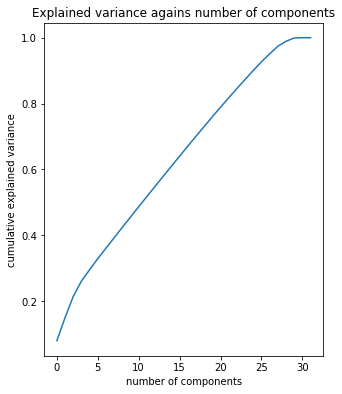

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("Explained variance agains number of components");

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.07961676, 0.14971162, 0.21394318, 0.26065395, 0.29506599,
       0.3288322 , 0.36063591, 0.39236422, 0.42393388, 0.45525459,
       0.48648436, 0.51753804, 0.54844202, 0.57911038, 0.60972916,
       0.64020474, 0.67046077, 0.70045851, 0.73019667, 0.75968808,
       0.78896145, 0.81746068, 0.84538101, 0.87302407, 0.90029157,
       0.92682099, 0.95082797, 0.97395451, 0.98903449, 0.99907506,
       0.99999253, 1.        ])

We need at least 26 components in order to account for 92% of the variance

In [65]:
pca = PCA(n_components=26)

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val)

print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))
print("Reduced shape, validation pca: {}".format(str(X_val_pca.shape)))
print(type(X_train_pca))

Original shape: (56250, 32)
Reduced shape: (56250, 26)
Reduced shape, validation pca: (18750, 26)
<class 'numpy.ndarray'>


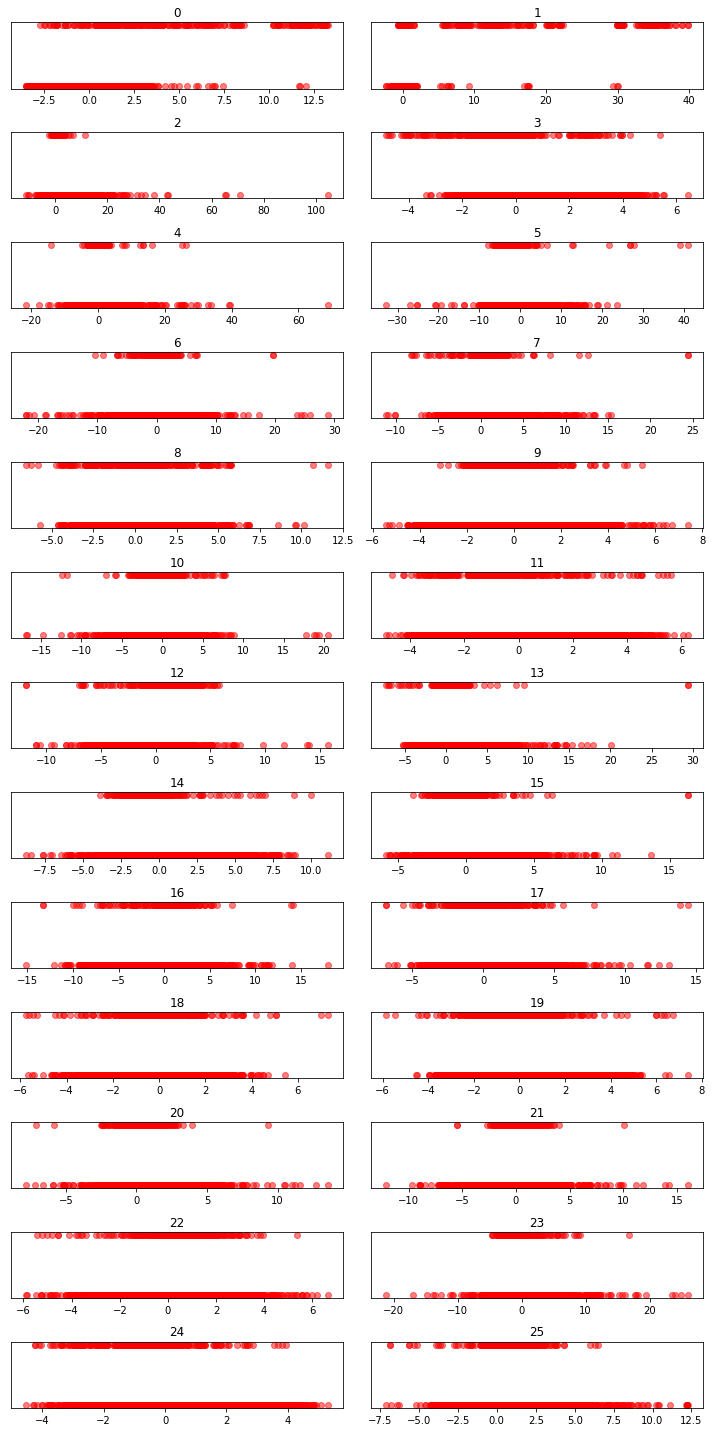

In [66]:
##let's see how the 26 principal components relate with the target variable

X_train_pca = pd.DataFrame(data=X_train_pca)
columns = list(X_train_pca.columns) 
fig, axes = plt.subplots(13, 2, figsize=(10, 20))
ax = axes.ravel()


# plot for each of the 26 features
for i in range(26):
    ax[i].scatter(X_train_pca.iloc[:, i],y_train_val, color='red', alpha=.5)
    ax[i].set_title(columns[i])
    ax[i].set_yticks(())

fig.tight_layout()
 
# It would now appear that we now have variables that 
# cn sort of diferenciate a bit better whether we are in the presence of fraud or not

# Balancing the data

In this part we will try to balance the data we have, for tha we will create synthetic events using SMOTE . We will later compare how our models work on the balanced and imbalanced data.

In [67]:
from imblearn.over_sampling import SMOTE

print("the shape of X_train_val is :",X_train_val.shape)
print("the shape of y_train_val is :",y_train_val.shape)
print("the shape of X_val is :",X_val.shape)

from collections import Counter
print('The distibution in the UNBALANCED data of y_train_val:',sorted(Counter(y_train_val).items()))

the shape of X_train_val is : (56250, 32)
the shape of y_train_val is : (56250,)
the shape of X_val is : (18750, 32)
The distibution in the UNBALANCED data of y_train_val: [(0, 55966), (1, 284)]


In [68]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train_val, y_train_val)
print(X_train_val.shape, "Unbalanced training set.")
print(X_resampled.shape, "Balanced training set.")
print('The distibution of the target in the BALANCED data:',sorted(Counter(y_resampled).items()))

(56250, 32) Unbalanced training set.
(111932, 32) Balanced training set.
The distibution of the target in the BALANCED data: [(0, 55966), (1, 55966)]


In [69]:
X_resampled = pd.DataFrame(data=X_resampled)
y_resampled = pd.DataFrame(data=y_resampled)
columns = list(data.columns) 

print(type(X_resampled))
print(type(y_resampled))
print(X_resampled.shape)
print(y_resampled.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(111932, 32)
(111932, 1)


In [70]:
not_fraud = X_resampled.loc[y_resampled.Class == 0]
fraud = X_resampled.loc[y_resampled.Class == 1]
print(y_resampled.shape,fraud.shape,X_resampled.shape)

(111932, 1) (55966, 32) (111932, 32)


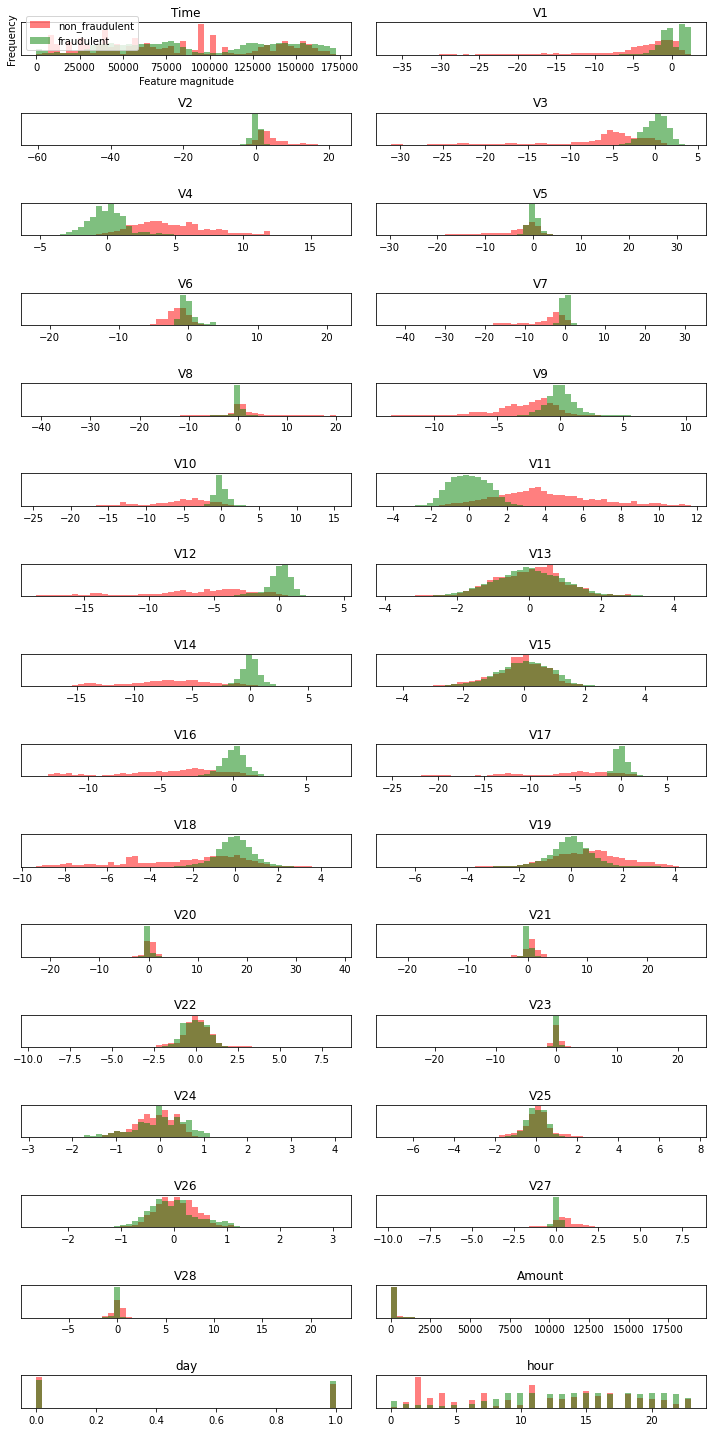

In [71]:
fig, axes = plt.subplots(16, 2, figsize=(10, 20))
# ravel() function is used to create a contiguous flattened array.
ax = axes.ravel()

# plot for each of the 30 features
for i in range(32):
    _, bins = np.histogram(X_resampled.iloc[:, i], bins=50)
    ax[i].hist(fraud.iloc[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(not_fraud.iloc[:, i], bins=bins, color='green', alpha=.5)
    ax[i].set_title(columns_without_class[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["non_fraudulent", "fraudulent"], loc="best")
fig.tight_layout()

What can we conclude from this ? that fraudulent events mimic very well non fraudulent events, however, we do have some variables that seem to be super relevant when dealing with balanced data.

# Modeling

## Modeling
You should implemente AT LEAST ONE approach we covered so far, and tune of at least one hyperparameter.
Do not forget that you should split your data into train and test set.
You should do model selection and tuning using cross validation on the train set.
Explain and justify what is the metric you are using for model selection and tuning.

## 1st - Simple model unsing the test and the validation set
## 2nd - Simple modeling with variables chosen by the feature selection, PCA and balanced data
## 3rd - try a more sophisticated method on the balanced data

### Density based clustering method

We will now implement the density based clustering method
We do not expect it to go perfectly well, because it is known that it does not work to well for high dimensions

In [72]:
scaler = StandardScaler()

print("the shape of X_train_val is :",X_train_val.shape)
print("the shape of X_val is :",X_val.shape)

print("the shape of X_train_scaled is :",X_train_scaled.shape)
print("the shape of X_test_scaled is :",X_val_scaled.shape)
print("the shape of y_train_val is :",y_train_val.shape)
print("the shape of y_val is :",y_val.shape)

the shape of X_train_val is : (56250, 32)
the shape of X_val is : (18750, 32)
the shape of X_train_scaled is : (56250, 32)
the shape of X_test_scaled is : (18750, 32)
the shape of y_train_val is : (56250,)
the shape of y_val is : (18750,)


We will now turn our attention to discover the best parameter values to use DBSCAN.
To discover the man distance betweeen neighbours we focus on this approach: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf.
When it comes to discover the minimun number of samples we go according to a papper by Sander et al., 1998. 
The minimun number of samples to be use in the DBSCAN techinique should be 2*dimension_of_the_dataset.
In this case we have that variables seem to be uncorrelated and given we do not
know what the variables stand for we must assume that they are independant, and so, that 
our dataset as got a dimension of 32

In [73]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [74]:
neighbors = NearestNeighbors(n_neighbors=64)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

In [75]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

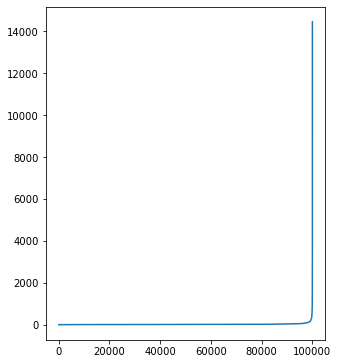

In [76]:
fig = plt.plot(distances);

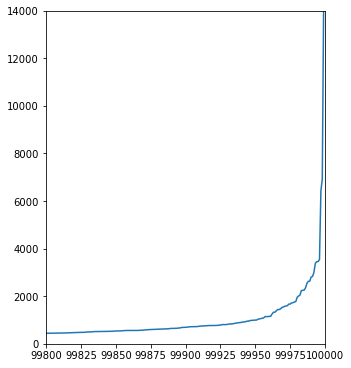

In [77]:
plt.axis([99800, 100000, 0, 14000])
plt.plot(distances);

This would suggest eps = 3000, however this would take far to much to run (it actually crashed my google chrome) and we decided to opt for a simpler approach!

In [78]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 4 , min_samples = 64)
# I started with 4 of max distance because we have high dimentional problem
model = dbscan.fit(X_train_scaled)

In [79]:
#How many Clusters do we have; outliers have the label of -1
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters

1

We test this first attempt in the validation set 

In [81]:
y_pred_dbs = dbscan.fit_predict(X_val_scaled) 
for i in range(len(y_pred_dbs)):
    if y_pred_dbs[i] == -1:
        y_pred_dbs[i] = 1  
    else:
        y_pred_dbs[i] = 0

In [82]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred_dbs = np.array(y_pred_dbs)

print(confusion_matrix(y_val, y_pred_dbs))
##Let's see how this intial guess did

specificity = confusion_matrix(y_val, y_pred_dbs)[1][1]/(confusion_matrix(y_val, y_pred_dbs)[1][1]+confusion_matrix(y_val, y_pred_dbs)[1][0])
recall = confusion_matrix(y_val, y_pred_dbs)[0][0]/(confusion_matrix(y_val, y_pred_dbs)[0][0]+confusion_matrix(y_val, y_pred_dbs)[0][1])
precision =  confusion_matrix(y_val, y_pred_dbs)[0][0]/(confusion_matrix(y_val, y_pred_dbs)[0][0]+confusion_matrix(y_val, y_pred_dbs)[1][0])
f1_score = 2*recall*precision/(recall+precision)
print(f"The f1 score is:  {f1_score} and the specificity is :{specificity}")

[[16643  2005]
 [    8    94]]
The f1 score is:  0.9429728887503895 and the specificity is :0.9215686274509803


A high f1_score is expected given we have so few fraudulent transactions. The score that makes sense here would be the specificity, which is the rate of true negatives. This is because fraude is considered a negative.

### Parameter tunning 

Cross validation is kind of hard because DBSCAn does not really have a score

In [83]:
from sklearn.pipeline import make_pipeline
def DensityClustering(max_dist,min_ng):
    return make_pipeline(DBSCAN(eps = max_dist , min_samples = min_ng))

In [87]:
## Don't give up, it takes around 7 ot 8  minutes but this code does run xD
dist_range = np.arange(3,5.5,0.5)

start_time = time.time()

for dist in dist_range:
    model = DensityClustering(dist,60)
    model.fit(X_train_scaled)
    y_pred_dbs = model.fit_predict(X_val_scaled)
    for i in range(len(y_pred_dbs)):
        if y_pred_dbs[i] == -1:
            y_pred_dbs[i] = 1  
        else:
            y_pred_dbs[i] = 0
    y_pred_dbs = np.array(y_pred_dbs)
    
    specificity = confusion_matrix(y_val, y_pred_dbs)[1][1]/(confusion_matrix(y_val, y_pred_dbs)[1][1]+confusion_matrix(y_val, y_pred_dbs)[1][0])
    recall = confusion_matrix(y_val, y_pred_dbs)[0][0]/(confusion_matrix(y_val, y_pred_dbs)[0][0]+confusion_matrix(y_val, y_pred_dbs)[0][1])
    precision =  confusion_matrix(y_val, y_pred_dbs)[0][0]/(confusion_matrix(y_val, y_pred_dbs)[0][0]+confusion_matrix(y_val, y_pred_dbs)[1][0])
    f1_score = 2*recall*precision/(recall+precision)
    
    print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_dbs))
    print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)
    
print("\n --- %s seconds ---" % (time.time() - start_time))

The confusion matrix is: 
 [[11995  6653]
 [    7    95]]
The f1 score is:  0.7827079934747145    and the specificity is :  0.9313725490196079
The confusion matrix is: 
 [[15104  3544]
 [    7    95]]
The f1 score is:  0.8948132349891881    and the specificity is :  0.9313725490196079
The confusion matrix is: 
 [[16674  1974]
 [    8    94]]
The f1 score is:  0.9439003679592414    and the specificity is :  0.9215686274509803
The confusion matrix is: 
 [[17448  1200]
 [   11    91]]
The f1 score is:  0.9664607970753594    and the specificity is :  0.8921568627450981
The confusion matrix is: 
 [[17849   799]
 [   14    88]]
The f1 score is:  0.9777327380789351    and the specificity is :  0.8627450980392157

 --- 315.87471628189087 seconds ---


It would seem that our f1 score is small for a max distance between samples that is small, however this is where we get a higher specificity. On the other hand with a distance bigger than 4 even though our f1 rises a lot we get lower specificity. So maybe a 4 is our equilibrium point.

Maybe it was actually a good thing not to use eps = 2000 as the literature recommended.
It is possible that distances are not that separeted (even though we have a lot of dimensions), because fraudulent transactions try to mimic normal transactions as much as possible

Let's now try to optimize The minimum number of neighbours
It would have been optimal to do so within the loop we add before in order to have diferent combinations of min_samples and max_distance, however our computers are humble and do not seem to have the power to do so in a reasonable amount of time. \
Again, don't give up on us, it takes around 7 or 8 minutes but this code does run xD

In [91]:
ng = np.arange(56,68,4)


for neighbors in ng:
    model = DensityClustering(4,neighbors)
    model.fit(X_train_scaled)
    y_pred_dbs = model.fit_predict(X_val_scaled)
    for i in range(len(y_pred_dbs)):
        if y_pred_dbs[i] == -1:
            y_pred_dbs[i] = 1  
        else:
            y_pred_dbs[i] = 0
    y_pred_dbs = np.array(y_pred_dbs)
    
    specificity = confusion_matrix(y_val, y_pred_dbs)[1][1]/(confusion_matrix(y_val, y_pred_dbs)[1][1]+confusion_matrix(y_val, y_pred_dbs)[1][0])
    recall = confusion_matrix(y_val, y_pred_dbs)[0][0]/(confusion_matrix(y_val, y_pred_dbs)[0][0]+confusion_matrix(y_val, y_pred_dbs)[0][1])
    precision =  confusion_matrix(y_val, y_pred_dbs)[0][0]/(confusion_matrix(y_val, y_pred_dbs)[0][0]+confusion_matrix(y_val, y_pred_dbs)[1][0])
    f1_score = 2*recall*precision/(recall+precision)
    
    
    print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)


The f1 score is:  0.944537149645049    and the specificity is :  0.8921568627450981
The f1 score is:  0.9439003679592414    and the specificity is :  0.9215686274509803
The f1 score is:  0.9429728887503895    and the specificity is :  0.9215686274509803


Parameter Tunning results for the DBSCAN:
we conclude that a good set of parameters to use DBSCAN, using specifity as a metric, with would be:

- eps(max distance between neighbours) = 4 
- min_samples(minimun number of samples to form a cluster) = 60

#### DBScan clearly beats the simple decision tree!

# 2nd - Modling on the valriables chosen by the feature selection and unsing the balanced data 

### DBSCAN with the feature selection data

We start by using the first 25 variables chosen by the feature selection

In [96]:
col = X_val.columns.values #get column names

In [93]:
X_train_red = pd.DataFrame(X_train_scaled, columns = col)
var_drop = []
for column in X_train_red:
    if column not in best_var:
       var_drop.append(column)

X_train_red = X_train_red.drop(var_drop, axis = 1)
X_val_red = X_val.drop(var_drop, axis = 1)
print(X_train_red.shape)
print(X_val_red.shape)
X_train_red.describe()

(56250, 25)
(18750, 25)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V24,Amount,day,hour
count,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,...,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04,5.625000e+04
mean,-1.869517e-17,-3.284286e-18,2.526374e-19,1.781094e-17,3.789561e-18,8.589672e-18,4.926430e-18,1.642143e-18,-5.052748e-18,-1.389506e-18,...,-1.515825e-18,-3.284286e-18,-3.284286e-18,1.010550e-18,-2.526374e-18,-2.223209e-17,3.157968e-18,-7.579123e-19,-1.714145e-16,-5.248542e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.815288e+01,-3.529770e+01,-1.921236e+01,-3.645865e+00,-2.116057e+01,-1.643837e+01,-3.315088e+01,-3.340576e+01,-1.201695e+01,-2.089871e+01,...,-2.459667e+01,-1.083674e+01,-8.506981e+00,-2.884302e+01,-3.054036e+01,-1.297497e+01,-4.689010e+00,-3.329953e-01,-9.839510e-01,-2.387698e+00
25%,-4.501331e-01,-3.575624e-01,-5.418999e-01,-5.962123e-01,-4.917866e-01,-5.720822e-01,-4.100773e-01,-1.711284e-01,-5.734302e-01,-4.471980e-01,...,-4.561855e-01,-5.730350e-01,-5.616280e-01,-2.699783e-01,-3.091614e-01,-7.425031e-01,-5.854169e-01,-3.127911e-01,-9.839510e-01,-6.818746e-01
50%,7.671076e-03,3.661875e-02,1.224707e-01,-2.430295e-02,-3.252175e-02,-2.040928e-01,4.699142e-02,1.900008e-02,-4.223187e-02,-6.665031e-02,...,-4.792548e-02,6.337529e-03,2.254730e-03,-8.034613e-02,-4.263876e-02,6.785338e-03,6.503964e-02,-2.517833e-01,-9.839510e-01,4.548863e-04
75%,6.653674e-01,4.699002e-01,6.491754e-01,5.139546e-01,4.400605e-01,2.998467e-01,4.496520e-01,2.701461e-01,5.408429e-01,3.981500e-01,...,4.147007e-01,5.901535e-01,5.670419e-01,1.666366e-01,2.495792e-01,7.193731e-01,7.248665e-01,-4.736133e-02,1.016311e+00,8.533667e-01
max,1.234054e+00,1.286575e+01,2.599753e+00,1.167001e+01,2.342735e+01,1.598246e+01,2.401937e+01,1.628225e+01,9.266435e+00,1.297879e+01,...,7.468910e+00,5.489912e+00,5.643848e+00,4.812437e+01,3.643700e+01,1.142013e+01,6.677139e+00,7.081448e+01,1.016311e+00,1.535696e+00


In [94]:
print("the shape of X_train_val is :",X_train_val.shape)
print("the shape of X_val is :",X_val.shape)
print("the shape of y_train_val is :",y_train_val.shape)
print("the shape of y_val is :",y_val.shape, "\n")
print("Reduced data")
print("the shape of X_train_red is :",X_train_red.shape, ", data is still scaled")
print("the shape of X_val_red is :",X_val_red.shape, ", data is still scaled")

the shape of X_train_val is : (56250, 32)
the shape of X_val is : (18750, 32)
the shape of y_train_val is : (56250,)
the shape of y_val is : (18750,) 

Reduced data
the shape of X_train_red is : (56250, 25) , data is still scaled
the shape of X_val_red is : (18750, 25) , data is still scaled


In [95]:
from sklearn.pipeline import make_pipeline
def DensityClustering(max_dist,min_ng):
    return make_pipeline(DBSCAN(eps = max_dist , min_samples = min_ng))
## Don't give up, it takes around 7 ot 8  minutes but this code does run xD
dist_range = np.arange(3,5.5,0.5)

start_time = time.time()

for dist in dist_range:
    model = DensityClustering(dist,48) # we have 24 dimensions now
    model.fit(X_train_red)
    y_pred_dbs_red = model.fit_predict(X_val_red)
    for i in range(len(y_pred_dbs_red)):
        if y_pred_dbs_red[i] == -1:
            y_pred_dbs_red[i] = 1  
        else:
            y_pred_dbs_red[i] = 0
    y_pred_dbs_red = np.array(y_pred_dbs_red)
    
    specificity = confusion_matrix(y_val, y_pred_dbs_red)[1][1]/(confusion_matrix(y_val, y_pred_dbs_red)[1][1]+confusion_matrix(y_val, y_pred_dbs_red)[1][0])
    recall = confusion_matrix(y_val, y_pred_dbs_red)[0][0]/(confusion_matrix(y_val, y_pred_dbs_red)[0][0]+confusion_matrix(y_val, y_pred_dbs_red)[0][1])
    precision =  confusion_matrix(y_val, y_pred_dbs_red)[0][0]/(confusion_matrix(y_val, y_pred_dbs_red)[0][0]+confusion_matrix(y_val, y_pred_dbs_red)[1][0])
    f1_score = 2*recall*precision/(recall+precision)
    
    print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_dbs_red))
    print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)

print("\n--- %s seconds ---" % (time.time() - start_time))


The confusion matrix is: 
 [[ 2381 16267]
 [    2   100]]
The f1 score is:  0.22642765441491133    and the specificity is :  0.9803921568627451
The confusion matrix is: 
 [[ 4504 14144]
 [    3    99]]
The f1 score is:  0.3890304469876916    and the specificity is :  0.9705882352941176
The confusion matrix is: 
 [[ 6758 11890]
 [    3    99]]
The f1 score is:  0.5319375024597583    and the specificity is :  0.9705882352941176
The confusion matrix is: 
 [[9979 8669]
 [   8   94]]
The f1 score is:  0.6969792212327571    and the specificity is :  0.9215686274509803
The confusion matrix is: 
 [[12308  6340]
 [   10    92]]
The f1 score is:  0.7949363818381451    and the specificity is :  0.9019607843137255

--- 377.8744275569916 seconds ---


Unfortunately, the reduction of variables did not lead to a significantly faster estimation of our model.

Safe to say that the feature selection is not very helpfull as it reducues the specificity considerably. Let's see how the PCA does.

### DBSCAN with the pca data

Originally we had planned to fit DBScan with the components of PCA. However, the previous analysis with reduced variables showed us that we can neither expect a gain in time nor that the model will become stronger. For this reason, we decide against modelling with PCA data, especially considering that our data set is not large.

### Decision Tree
#### with balanced data

In [97]:
#just to remember the data we are using
print(X_resampled.shape, "Shape of X train in the balanced set.")
print(X_val.shape, "Shape of X in the validation set.")
print(y_resampled.shape, "Shape of y train in the balanced set")
print(y_val.shape, "Shape of y validation in the balanced set")

(111932, 32) Shape of X train in the balanced set.
(18750, 32) Shape of X in the validation set.
(111932, 1) Shape of y train in the balanced set
(18750,) Shape of y validation in the balanced set


In [98]:
# Setup the parameters and distributions to sample from: param_dist
distributions = {"max_depth": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree_bal = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
random_search_bal = RandomizedSearchCV(tree_bal, distributions, n_iter=20,random_state=1,cv=10, scoring='f1')

# Fit it to the data
random_search_bal.fit(X_resampled,y_resampled)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters with PCA: {}".format(random_search_bal.best_params_))
print("Best score is {}".format(random_search_bal.best_score_))

Tuned Decision Tree Parameters with PCA: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6}
Best score is 0.9909157863398284


In [99]:
y_pred_tree_bal = random_search_bal.best_estimator_.predict(X_val)
print(classification_report(y_val, y_pred_tree_bal))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18648
           1       0.35      0.88      0.50       102

    accuracy                           0.99     18750
   macro avg       0.67      0.94      0.75     18750
weighted avg       1.00      0.99      0.99     18750



In [100]:
specificity = confusion_matrix(y_val, y_pred_tree_bal)[1][1]/(confusion_matrix(y_val, y_pred_tree_bal)[1][1]+confusion_matrix(y_val, y_pred_tree_bal)[1][0])
recall = confusion_matrix(y_val, y_pred_tree_bal)[0][0]/(confusion_matrix(y_val, y_pred_tree_bal)[0][0]+confusion_matrix(y_val, y_pred_tree_bal)[0][1])
precision =  confusion_matrix(y_val, y_pred_tree_bal)[0][0]/(confusion_matrix(y_val, y_pred_tree_bal)[0][0]+confusion_matrix(y_val, y_pred_tree_bal)[1][0])
f1_score = 2*recall*precision/(recall+precision)
    
print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_tree_bal))
print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)
    

The confusion matrix is: 
 [[18478   170]
 [   12    90]]
The f1 score is:  0.9950993591469655    and the specificity is :  0.8823529411764706


It can be seen that a simple model like the decision tree with a balanced data set performs weaker than the model DBScan in calssifying frauds. 

We restrict ourselves to a balanced data set in the sophisticated methods.

# 3rd - try a more sophisticated method on the balanced data

As an stronger and more sophisticated model we're fitting an XGBoost model and a Randomforest stacked with an Logistic Regression on the balanced data set. Again we're using only the test and the validation set briefly outlined below.

In [125]:
print("Unbalanced dataset")
print(X_train_val.shape, "X in the training set")
print(X_val.shape, "X in the validation set")
print(y_train_val.shape, "target in the train set.")
print(y_val.shape, "target in the validation set.")
print("Balanced dataset")
print(X_resampled.shape, "X in the balanced training set")
print(y_resampled.shape, "taget in the balanced validation set")

Unbalanced dataset
(56250, 32) X in the training set
(18750, 32) X in the validation set
(56250,) target in the train set.
(18750,) target in the validation set.
Balanced dataset
(111932, 32) X in the balanced training set
(111932, 1) taget in the balanced validation set


In [126]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="auc" )
xgb.fit(X_resampled, y_resampled)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [127]:
y_pred_xb= xgb.predict(X_val)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [104]:
print(np.unique(y_pred_xb))
print((np.unique(y_val)))

[0 1]
[0 1]


In [105]:
roc_auc_score(y_val, y_pred_xb) 

0.9360600095894214

In [106]:
specificity = confusion_matrix(y_val, y_pred_xb)[1][1]/(confusion_matrix(y_val, y_pred_xb)[1][1]+confusion_matrix(y_val, y_pred_xb)[1][0])
recall = confusion_matrix(y_val, y_pred_xb)[0][0]/(confusion_matrix(y_val, y_pred_xb)[0][0]+confusion_matrix(y_val, y_pred_xb)[0][1])
precision =  confusion_matrix(y_val, y_pred_xb)[0][0]/(confusion_matrix(y_val, y_pred_xb)[0][0]+confusion_matrix(y_val, y_pred_xb)[1][0])
f1_score = 2*recall*precision/(recall+precision)
    
print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_xb))
print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)

The confusion matrix is: 
 [[18640     8]
 [   13    89]]
The f1 score is:  0.9994370124125359    and the specificity is :  0.8725490196078431


So it's safe to say that the best course of action is to balance the data and use XGBoost and given the results are so good in the validation set we will give it a go in the test set without parameter tunning. We did try some tunning but given the large amount of data we have it is just not possible to run a proper parameter tunning in decent time.

In [107]:
#Tune parameters with cross validation

In [128]:
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric="auc", error = 0.3,reg_lambda = 2, learning_rate =  0.1 )
xgb2.fit(X_train_val, y_train_val);
# apparently we cannot adjust the threshold

[14:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "error" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [129]:
y_pred_xgb= xgb2.predict(X_val)
specificity = confusion_matrix(y_val, y_pred_xgb)[1][1]/(confusion_matrix(y_val, y_pred_xgb)[1][1]+confusion_matrix(y_val, y_pred_xgb)[1][0])
recall = confusion_matrix(y_val, y_pred_xgb)[0][0]/(confusion_matrix(y_val, y_pred_xgb)[0][0]+confusion_matrix(y_val, y_pred_xgb)[0][1])
precision =  confusion_matrix(y_val, y_pred_xgb)[0][0]/(confusion_matrix(y_val, y_pred_xgb)[0][0]+confusion_matrix(y_val, y_pred_xgb)[1][0])
f1_score = 2*recall*precision/(recall+precision)
    
print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_xgb))
print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)

The confusion matrix is: 
 [[18642     6]
 [   16    86]]
The f1 score is:  0.9994102825282797    and the specificity is :  0.8431372549019608


### Stacked model, RandomForest and LogisticRegression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
('lr', LogisticRegression(solver='liblinear')),
('forest', RandomForestClassifier(random_state=42, n_estimators=10) )]
    
stacking = StackingClassifier(estimators=estimators, 
                          final_estimator=LogisticRegression(solver='liblinear'))
stacking.fit(X_resampled, y_resampled)
lr, forest = stacking.estimators_
lr.score(X_val, y_val), forest.score(X_val, y_val),  stacking.score(X_val, y_val)

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.98272, 0.9987733333333333, 0.9987733333333333)

In [111]:
y_pred_stack = stacking.predict(X_val)

specificity = confusion_matrix(y_val, y_pred_stack)[1][1]/(confusion_matrix(y_val, y_pred_stack)[1][1]+confusion_matrix(y_val, y_pred_stack)[1][0])
recall = confusion_matrix(y_val, y_pred_stack)[0][0]/(confusion_matrix(y_val, y_pred_stack)[0][0]+confusion_matrix(y_val, y_pred_stack)[0][1])
precision =  confusion_matrix(y_val, y_pred_stack)[0][0]/(confusion_matrix(y_val, y_pred_stack)[0][0]+confusion_matrix(y_val, y_pred_stack)[1][0])
f1_score = 2*recall*precision/(recall+precision)

print("The confusion matrix is: \n",confusion_matrix(y_val, y_pred_stack))
print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)

The confusion matrix is: 
 [[18639     9]
 [   14    88]]
The f1 score is:  0.999383394547063    and the specificity is :  0.8627450980392157


### The first fitted XGBoost model and the stacked model on the balanced data have an advantage agains all other models!

In the next step we gonna use our chosen model and see how it strong it is on the test test.

Given that we added reguralization on Xgboost we will choose it as a final model, because not only is it doing well but it is also more likely to generalize well due to this regularization. In regards to dbscan, even though it does better in dectecting frauds, it ends up with to many false positives. So Xgboost will be the chosen method. The Stacked model is also built with no regularization, so it is likely to be overfitting. 

# MODEL EVALUATION

## Model evaluation

After selecting and tuning your model on the train set, you should evaluate its performance on the test set. 
You might have tuned your model using a certain metric, but now you should describe the model performance using all relevant metrics. 
If you have some business insight, why a certain metric is relevant, you should explain it. 
For example in disease detection, you might not want to have a false positive rate higher than some threshold (say 5%).

If you preformed clustering, you should describe and visualize your clusters.

In [112]:
print("the shape of X_test is :",X_test.shape)
print("the shape of y_test is :",y_test.shape)
print("the shape of X_train is :",X_train.shape)
print("the shape of y_train is :",y_train.shape)
X_test.describe()

the shape of X_test is : (25000, 32)
the shape of y_test is : (25000,)
the shape of X_train is : (75000, 32)
the shape of y_train is : (75000,)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,day,hour
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000
mean,94274.389560,-0.002688,-0.002175,-0.027917,0.003572,-0.013886,-0.004035,-0.015404,0.016204,-0.020343,...,0.002331,-0.002666,0.000402,0.000682,-0.003807,0.000788,-0.001685,89.278720,0.48860,13.972480
std,47411.206989,1.981393,1.623131,1.608373,1.433877,1.403030,1.329368,1.271292,1.234432,1.103131,...,0.716158,0.582545,0.610076,0.522207,0.479061,0.392972,0.294782,244.716637,0.49988,5.850324
min,1.000000,-32.962810,-34.607649,-32.965346,-5.043049,-31.356750,-23.496714,-31.197329,-39.267378,-9.462573,...,-8.887017,-30.269720,-2.807897,-6.429334,-1.641329,-8.839766,-8.656570,0.000000,0.00000,0.000000
25%,53616.250000,-0.906196,-0.605345,-0.907040,-0.847819,-0.698509,-0.776827,-0.561047,-0.205694,-0.663490,...,-0.536592,-0.165221,-0.354468,-0.315601,-0.325401,-0.071263,-0.053595,5.490000,0.00000,10.000000
50%,84374.000000,0.036722,0.058471,0.171567,-0.024566,-0.054544,-0.274163,0.033953,0.028639,-0.069404,...,0.010491,-0.011115,0.042935,0.016741,-0.056969,0.001439,0.011711,22.000000,0.00000,14.000000
75%,138586.750000,1.314734,0.796681,1.012302,0.739936,0.615055,0.394997,0.575585,0.332436,0.582721,...,0.528262,0.147073,0.439658,0.353992,0.232663,0.089052,0.078176,78.000000,1.00000,19.000000
max,172784.000000,2.439207,18.183626,4.079168,11.864868,34.099309,20.379524,29.205868,18.709255,10.392889,...,6.790452,11.060305,3.962197,3.003097,3.220178,12.152401,9.076549,8790.260000,1.00000,23.000000


In [113]:
y_test.describe()

count    25000.000000
mean         0.004240
std          0.064978
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

We're now balancing the whole Training set with the method we used above.

In [114]:
X_resampled_fin, y_resampled_fin = SMOTE().fit_resample(X_train, y_train)

In [133]:
xgb_fin = XGBClassifier(use_label_encoder=False, eval_metric="auc", error = 0.3,reg_lambda = 2, learning_rate =  0.1 )
xgb_fin.fit(X_resampled_fin, y_resampled_fin)

[14:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "error" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, error=0.3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=2,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [134]:
y_pred_final = xgb_fin.predict(X_test)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [135]:
specificity = confusion_matrix(y_test, y_pred_final)[1][1]/(confusion_matrix(y_test, y_pred_final)[1][1]+confusion_matrix(y_test, y_pred_final)[1][0])
recall = confusion_matrix(y_test, y_pred_final)[0][0]/(confusion_matrix(y_test, y_pred_final)[0][0]+confusion_matrix(y_test, y_pred_final)[0][1])
precision =  confusion_matrix(y_test, y_pred_final)[0][0]/(confusion_matrix(y_test, y_pred_final)[0][0]+confusion_matrix(y_test, y_pred_final)[1][0])
f1_score = 2*recall*precision/(recall+precision)
    
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred_final))
print("The f1 score is: ",f1_score, "   and the specificity is : ",specificity)

The confusion matrix is: 
 [[24862    32]
 [   17    89]]
The f1 score is:  0.9990155305085086    and the specificity is :  0.839622641509434


 With a high f1 score one needs to look at the specificity, this is because we could say that all events are non fraudulent and still get a high f1 score. 
 In the test set the specificity is way smaller than when working with balanced data coming from the validation set, however we still ge a specificity of around 0.83 which is not that bad.

 # Interpretability

In [136]:
import xgboost
X_matrix = xgboost.DMatrix(X_test, label = y_test )

In [137]:
import shap

In [138]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_matrix)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


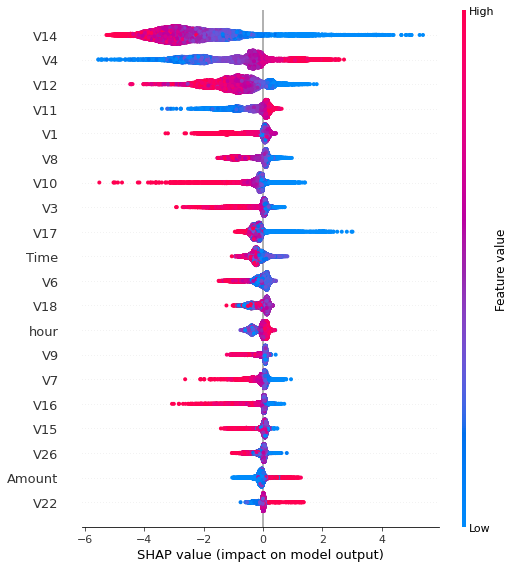

In [139]:
shap.summary_plot(shap_values,X_test)

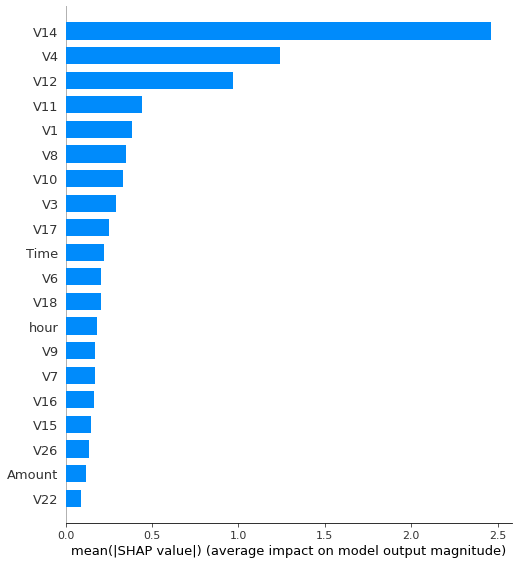

In [140]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

From the SHAP plots we see which variables seem to contribute more for the model, we see for example that higher values of V14 contribute a lot for the fact that the transaction is not fraudulent, whereas lower values od V14 contribute a lot as well for the fact that the transaction is fraudulent.
On the oposite side we have that when the variable V4 has low values we will probably not have a fraudulent transaction and when V4 has got high values we probably have Fraud.
In the context of the bussiness problem it's very hard to suggest some type of policy or even advice when it comes to suggest fraud because we really do not know the meaning of these variables.

## Next steps

If you already have an idea what are the next steps for your project, please describe them.
This part is not graded, but can help us give you feedback.